In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import glob

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = np.linspace(0, 1, 256)

In [3]:
f = 1 / (1 + np.exp(-(x - 0.6) * 7.))

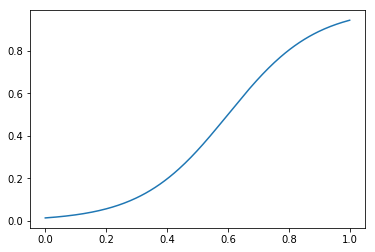

In [4]:
plt.plot(x, f)

In [5]:
data_path = '../data/processed/strain_est_low_fps/train.h5'

In [6]:
data = h5py.File(data_path)

In [7]:
data['tissue/data'].shape

KeyError: 'Unable to open object (component not found)'

In [8]:
frame = data['fixed'][45, :, :, 0]

In [9]:
enhanced = 1 / (1 + np.exp(-(frame - 0.6) * 7.))

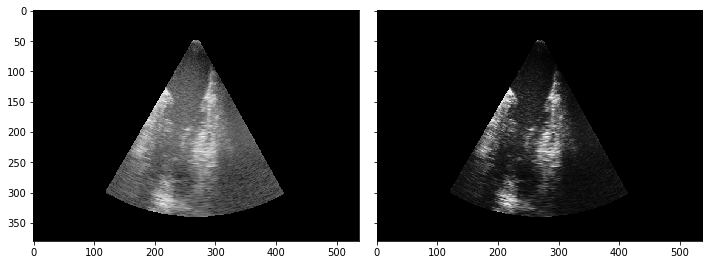

In [10]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 8))
ax[0].imshow(frame, cmap='Greys_r')
ax[1].imshow(enhanced, cmap='Greys_r')
plt.tight_layout()

In [50]:
data.close()

In [64]:
f = open('../../pal.txt')

In [76]:
line = f.readline()[:-1]

In [80]:
pal = np.array([int(val) for val in line.split(',')])

In [81]:
data = h5py.File(data_path)

In [83]:
frame = np.transpose(data['tissue/data'][:, :, 45]).astype('uint8')

In [84]:
enhanced = [[pal[frame[i, j]] for j in range(frame.shape[1])] for i in range(frame.shape[0])]

In [85]:
enhanced = np.array(enhanced)

In [86]:
enhanced.shape

(280, 396)

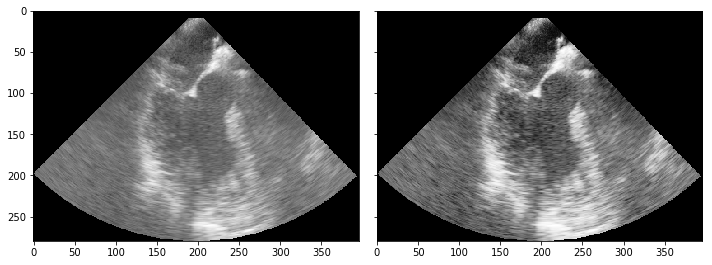

In [87]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 8))
ax[0].imshow(frame, cmap='Greys_r')
ax[1].imshow(enhanced, cmap='Greys_r')
plt.tight_layout()